<a href="https://colab.research.google.com/github/nicorunini/CCMACLRL_-COM232-_PROJECT/blob/main/Predicting_Student_Performance_Using_Machine_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings as wrn
wrn.filterwarnings('ignore')

data = pd.read_csv('student-por.csv')

Checking amd Analyzing Data

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
data.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
print("\nSummary Statistics:")
data.describe()




Summary Statistics:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Data Preprocessing

In [ ]:
data = pd.get_dummies(data, drop_first=True)

In [ ]:
data["pass"] = [1 if each >= 10 else 0 for each in data["G3"]]

In [ ]:
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,pass
0,18,4,4,2,2,0,4,3,4,1,...,False,True,False,False,False,True,True,False,False,1
1,17,1,1,1,2,0,5,3,3,1,...,False,False,True,False,False,False,True,True,False,1
2,15,1,1,1,2,0,4,3,2,2,...,False,True,False,False,False,True,True,True,False,1
3,15,4,2,1,3,0,3,2,2,1,...,False,False,True,False,True,True,True,True,True,1
4,16,3,3,1,2,0,4,3,2,1,...,False,False,True,False,False,True,True,False,False,1


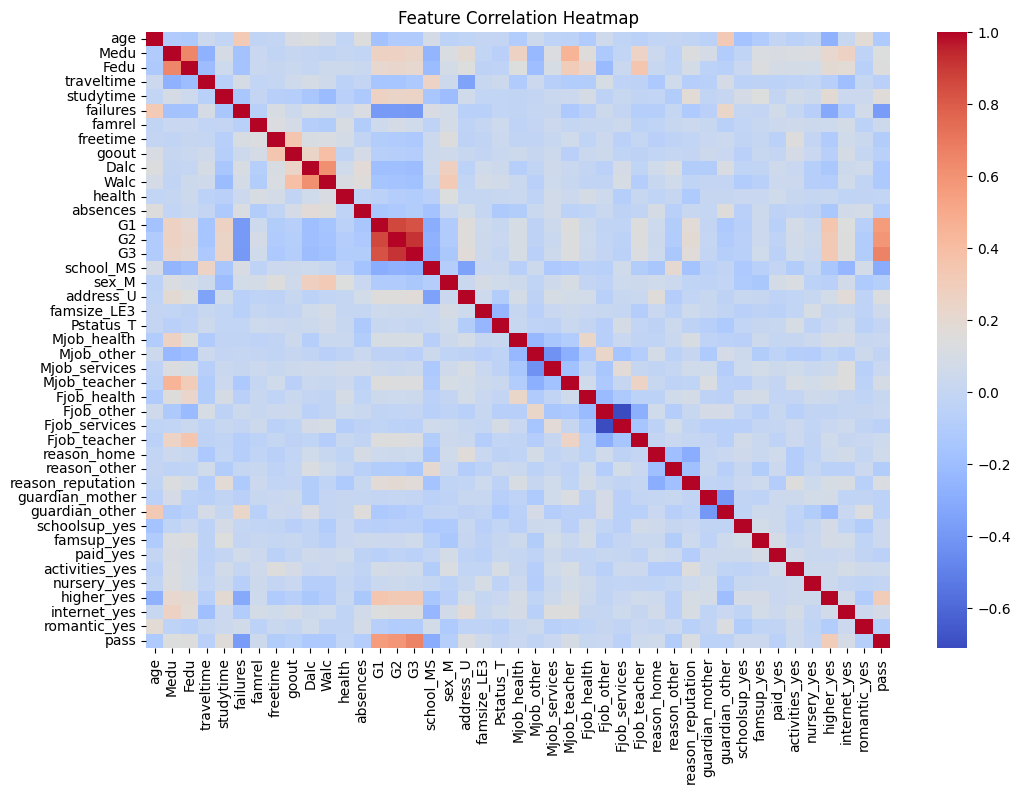

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

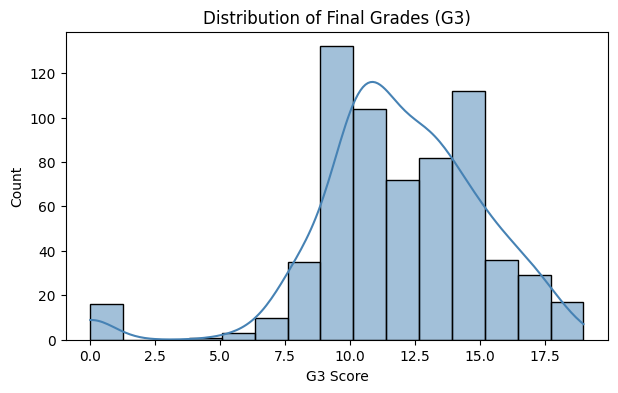

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data["G3"], kde=True, bins=15, color='steelblue')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("G3 Score")
plt.ylabel("Count")
plt.show()

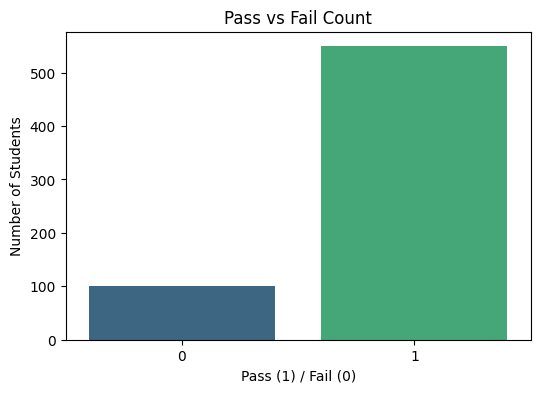

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="pass", data=data, palette="viridis")
plt.title("Pass vs Fail Count")
plt.xlabel("Pass (1) / Fail (0)")
plt.ylabel("Number of Students")
plt.show()

Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop(["G3", "pass"], axis=1)
y = data["pass"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.3)

score_list = {}

Confusion Matrix

In [ ]:
def plot_confusionMatrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()
    print(cm)

# KNN CLASSIFICATION


KNN Classifier Score is 0.8974358974358975


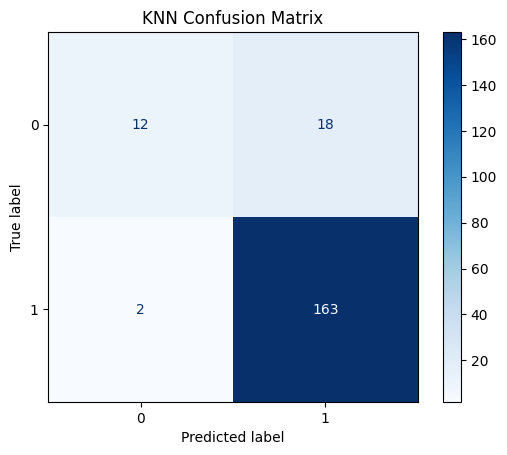

[[ 12  18]
 [  2 163]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=15)
KNN.fit(x_train, y_train)

knn_score = KNN.score(x_test, y_test)
score_list["KNN Classifier"] = knn_score
print(f"\nKNN Classifier Score is {knn_score}")

y_true = y_test
y_pred = KNN.predict(x_test)
plot_confusionMatrix(y_true, y_pred, "KNN Confusion Matrix")

# LOGISTIC REGRESSION


Logistic Regression Score is 0.9230769230769231


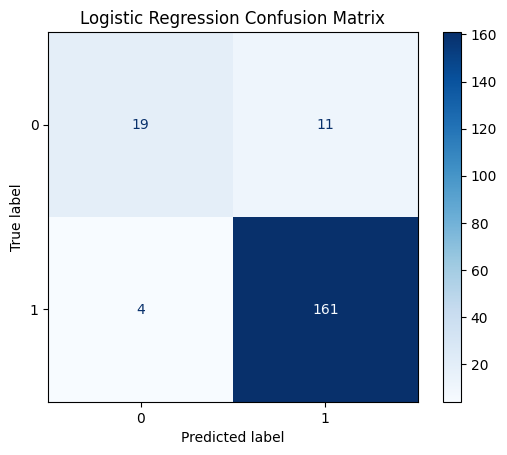

[[ 19  11]
 [  4 161]]


In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=200)
LR.fit(x_train, y_train)

lr_score = LR.score(x_test, y_test)
score_list["Logistic Regression"] = lr_score
print(f"\nLogistic Regression Score is {lr_score}")

y_pred = LR.predict(x_test)
plot_confusionMatrix(y_true, y_pred, "Logistic Regression Confusion Matrix")

#RANDOM FOREST CLASSIFICATION


Random Forest Classifier Score is 0.9179487179487179


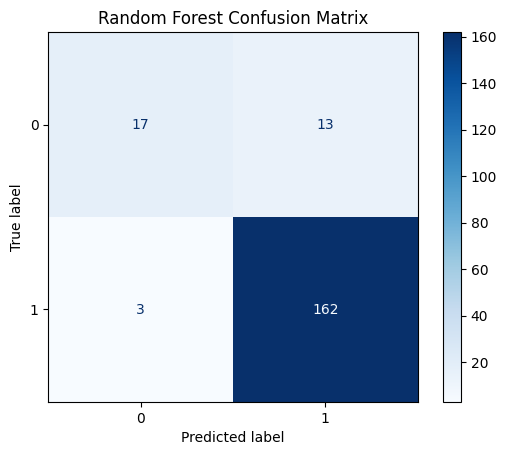

[[ 17  13]
 [  3 162]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, random_state=1)
RFC.fit(x_train, y_train)

rfc_score = RFC.score(x_test, y_test)
score_list["Random Forest Classifier"] = rfc_score
print(f"\nRandom Forest Classifier Score is {rfc_score}")

y_pred = RFC.predict(x_test)
plot_confusionMatrix(y_true, y_pred, "Random Forest Confusion Matrix")

Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

models = {
    "KNN Classifier": KNN,
    "Logistic Regression": LR,
    "Random Forest Classifier": RFC
}

for name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"\n{name} - Classification Report:\n")
    print(classification_report(y_test, y_pred))



KNN Classifier - Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.40      0.55        30
           1       0.90      0.99      0.94       165

    accuracy                           0.90       195
   macro avg       0.88      0.69      0.74       195
weighted avg       0.89      0.90      0.88       195


Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        30
           1       0.94      0.98      0.96       165

    accuracy                           0.92       195
   macro avg       0.88      0.80      0.84       195
weighted avg       0.92      0.92      0.92       195


Random Forest Classifier - Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.57      0.68        30
           1       0.93      0.98      0.95       165

    accuracy                           0.

# **Results and Comparison**


--- Model Comparison ---
KNN Classifier Score is 0.89 
Logistic Regression Score is 0.92 
Random Forest Classifier Score is 0.91 

The Best Performing Algorithm is:
Logistic Regression with 92.31% Accuracy


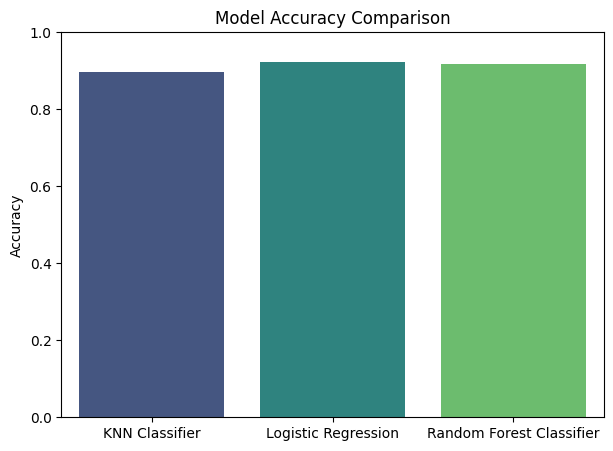

In [ ]:
print("\n--- Model Comparison ---")
for alg, score in score_list.items():
    print(f"{alg} Score is {str(score)[:4]} ")

sorted_scores = sorted(score_list.items(), key=lambda x: x[1], reverse=True)
best_model, best_score = sorted_scores[0]

print("\nThe Best Performing Algorithm is:")
print(f"{best_model} with {round(best_score * 100, 2)}% Accuracy")

plt.figure(figsize=(7,5))
sns.barplot(x=list(score_list.keys()), y=list(score_list.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

#KNN Optimization
knn_params = {
    "n_neighbors": [3, 5, 7, 9, 11, 15],
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(x_train, y_train)

print("\nBest KNN Parameters:", knn_grid.best_params_)
best_knn = knn_grid.best_estimator_
best_knn_score = best_knn.score(x_test, y_test)
print("Optimized KNN Accuracy:", round(best_knn_score, 4))


y_pred_knn_opt = best_knn.predict(x_test)
print("\nOptimized KNN - Classification Report:\n")
print(classification_report(y_test, y_pred_knn_opt))

#Logistic Regression Optimization
lr_params = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],
    "solver": ["lbfgs", "saga"],
}

lr_grid = GridSearchCV(LogisticRegression(max_iter=300), lr_params, cv=5)
lr_grid.fit(x_train, y_train)

print("\nBest Logistic Regression Parameters:", lr_grid.best_params_)
best_lr = lr_grid.best_estimator_
best_lr_score = best_lr.score(x_test, y_test)
print("Optimized Logistic Regression Accuracy:", round(best_lr_score, 4))

y_pred_lr_opt = best_lr.predict(x_test)
print("\nOptimized Logistic Regression - Classification Report:\n")
print(classification_report(y_test, y_pred_lr_opt))

#Random Forest Optimization
rfc_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

rfc_grid = GridSearchCV(RandomForestClassifier(random_state=1), rfc_params, cv=5)
rfc_grid.fit(x_train, y_train)

print("\nBest Random Forest Parameters:", rfc_grid.best_params_)
best_rfc = rfc_grid.best_estimator_
best_rfc_score = best_rfc.score(x_test, y_test)
print("Optimized Random Forest Accuracy:", round(best_rfc_score, 4))

y_pred_rfc_opt = best_rfc.predict(x_test)
print("\nOptimized Random Forest - Classification Report:\n")
print(classification_report(y_test, y_pred_rfc_opt))

#Best Model After Optimization
optimized_scores = {
    "Optimized KNN": best_knn_score,
    "Optimized Logistic Regression": best_lr_score,
    "Optimized Random Forest": best_rfc_score
}

best_opt_model = max(optimized_scores, key=optimized_scores.get)
print("\n\nBest Optimized Model:", best_opt_model, "with Accuracy =",
      round(optimized_scores[best_opt_model] * 100, 2), "%")



Best KNN Parameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Optimized KNN Accuracy: 0.9179

Optimized KNN - Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        30
           1       0.92      0.99      0.95       165

    accuracy                           0.92       195
   macro avg       0.90      0.76      0.81       195
weighted avg       0.92      0.92      0.91       195


Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Optimized Logistic Regression Accuracy: 0.9128

Optimized Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.60      0.68        30
           1       0.93      0.97      0.95       165

    accuracy                           0.91       195
   macro avg       0.86      0.78      0.81       195
weighted avg       0.91      0.91      0.91       195


Best Random F